## 线性回归示例

- [熟悉numpy](#熟悉numpy)
- [单变量线性回归](#单变量线性回归)
- [梯度下降](#梯度下降)

In [2]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### 熟悉numpy

In [3]:
def warmUpExercise():
    return(np.identity(5))

In [4]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 单变量线性回归

In [5]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

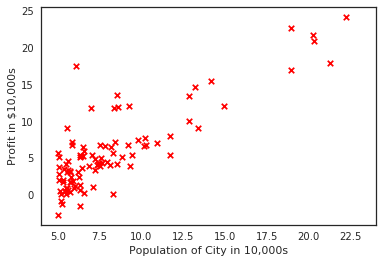

In [12]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

#### 梯度下降

In [13]:
# 计算损失函数
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [14]:
computeCost(X,y)

32.072733877455676

In [16]:
# 梯度下降
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


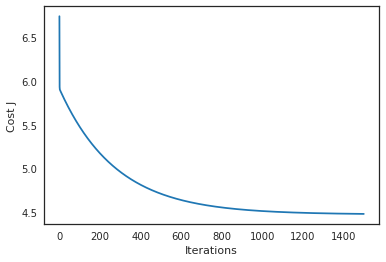

In [17]:
# 画出每一次迭代和损失函数变化
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

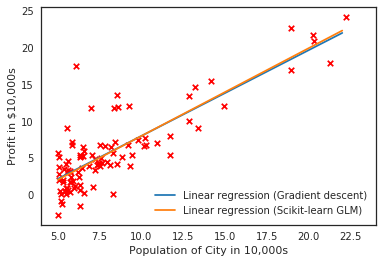

In [18]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# 画出我们自己写的线性回归梯度下降收敛的情况
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# 和Scikit-learn中的线性回归对比一下 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [19]:
# 预测一下人口为35000和70000的城市的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]
